# Quiz Pekan - 3

Dataset-dataset berikut ini menunjukkan persentase fat, protein, dan food yang dikonsumsi dari setiap jenis makanan yang terdaftar. Beberapa bagian akhir dataset juga mencakup persentase obesitas(Obesity), kurang gizi(Undernourished), dan kasus COVID-19 yang Terkonfirmasi(Confirmed)/Kematian(Deaths)/Sembuh(Recovered)/Aktif(Active).

(Catatan: Semua data memiliki unit '%' (persen) kecuali Populasi, unit persen tersebut dihitung berdasarkan jumlah populasi).

Link Download:

[Food_Supply_Quantity_kg_Data.csv](https://drive.google.com/uc?export=download&id=1cxisB1V00IBTDmuogSUCKQsmfmuwWRD5)

[Protein_Supply_Quantity_Data.csv](https://drive.google.com/uc?export=download&id=1g0WrtQrsQ8gXTOAVe-zyWTL2BaMFS6KX)

[Fat_Supply_Quantity_Data.csv](https://drive.google.com/uc?export=download&id=1Zeza76v_VH3i6fjP1eHOjfZ2xWQDY0Qp)

[Supply_Food_Data_Descriptions.csv](https://drive.google.com/uc?export=download&id=11JJ1CVbxaTWo8RSm8KmkrBCqHwCTIykh)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import Semua Data
df_food = pd.read_csv('Fat_Supply_Quantity_Data.csv')
df_protein = pd.read_csv('Protein_Supply_Quantity_Data.csv')
df_fat = pd.read_csv('Fat_Supply_Quantity_Data.csv')
df_category = pd.read_csv('Supply_Food_Data_Descriptions.csv')

In [3]:
df_food.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,...,17.0831,0.3593,4.5,29.8,0.098885,0.003635,0.078496,0.016754,38928000.0,%
1,Albania,0.0,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,...,9.2443,0.6503,22.3,6.2,0.366667,0.011240,0.217970,0.137456,2838000.0,%
2,Algeria,0.0,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,...,27.3606,0.5145,26.6,3.9,0.105176,0.003521,0.074363,0.027292,44357000.0,%
3,Angola,0.0,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,...,22.4638,0.1231,6.8,25,0.009166,0.000369,0.003736,0.005061,32522000.0,%
4,Antigua and Barbuda,0.0,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,...,14.4436,0.2469,19.1,NaN,0.096939,0.003061,0.092857,0.001020,98000.0,%


In [4]:
df_protein.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       170 non-null    object 
 1   Alcoholic Beverages           170 non-null    float64
 2   Animal Products               170 non-null    float64
 3   Animal fats                   170 non-null    float64
 4   Aquatic Products, Other       170 non-null    float64
 5   Cereals - Excluding Beer      170 non-null    float64
 6   Eggs                          170 non-null    float64
 7   Fish, Seafood                 170 non-null    float64
 8   Fruits - Excluding Wine       170 non-null    float64
 9   Meat                          170 non-null    float64
 10  Milk - Excluding Butter       170 non-null    float64
 11  Offals                        170 non-null    float64
 12  Oilcrops                      170 non-null    float64
 13  Pulse

In [5]:
df_fat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       170 non-null    object 
 1   Alcoholic Beverages           170 non-null    float64
 2   Animal Products               170 non-null    float64
 3   Animal fats                   170 non-null    float64
 4   Aquatic Products, Other       170 non-null    float64
 5   Cereals - Excluding Beer      170 non-null    float64
 6   Eggs                          170 non-null    float64
 7   Fish, Seafood                 170 non-null    float64
 8   Fruits - Excluding Wine       170 non-null    float64
 9   Meat                          170 non-null    float64
 10  Miscellaneous                 170 non-null    float64
 11  Milk - Excluding Butter       170 non-null    float64
 12  Offals                        170 non-null    float64
 13  Oilcr

In [6]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Categories  23 non-null     object
 1   Items       23 non-null     object
dtypes: object(2)
memory usage: 496.0+ bytes


In [7]:
df_category.head()

,Categories,Items
0,Alcoholic Beverages,"Alcohol, Non-Food; Beer; Beverages, Alcoholic;..."
1,Animal fats,"Butter, Ghee; Cream; Fats, Animals, Raw; Fish,..."
2,Animal Products,"Aquatic Animals, Others; Aquatic Plants; Bovin..."
3,"Aquatic Products, Other","Aquatic Animals, Others; Aquatic Plants; Meat,..."
4,Cereals - Excluding Beer,"Barley and products; Cereals, Other; Maize and..."


# Soal 1: Memisahkan kolom pada supply dataset antara kategori makanan dan bukan makanan

Teman-teman diminta untuk menampilkan list kolom-kolom pada supply DataFrame dengan ketentuan sebagai berikut:

*   all columns: list yang berisikan semua kolom pada supply DataFrame
*   supply columns: list yang berisikan semua kolom pada supply DataFrame berdasarkan kolom 'Categories' pada DataFrame df_category
*   non-supply columns: list yang berisikan semua kolom non-supply pada supply DataFrame


In [8]:
# Example
all_columns = df_food.columns.tolist()
print(f'All Columns : {all_columns} \n\n')

# Code here
supply_columns=[]
for a in df_food.columns:
  if a in df_category['Categories'].values:
    supply_columns.append(a)
print(f'Supply Columns : {supply_columns} \n\n')

non_supply_columns=[]
for a in df_food.columns:
  if a not in df_category['Categories'].values:
    non_supply_columns.append(a)
print(f'Non supply Columns : {non_supply_columns} \n\n')

All Columns : ['Country', 'Alcoholic Beverages', 'Animal Products', 'Animal fats', 'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Miscellaneous', 'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products', 'Vegetable Oils', 'Vegetables', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Population', 'Unit (all except Population)'] 


Supply Columns : ['Alcoholic Beverages', 'Animal Products', 'Animal fats', 'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Miscellaneous', 'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products', 'Vegetable Oils', 'Vegetables'] 


Non supply Columns : ['Country', 'Obesity', 'Unde

Expected Output:

![Expected Output:](https://drive.google.com/uc?id=1ItjI9ALd2I8tgJ2i8pa_UjdFfKS35mNu)

---

# Soal 2: Menggabungkan DataFrame



Gabungkan semua supply DataFrame dengan ketentuan tidak ada kolom dengan nama yang sama. Untuk kolom-kolom non-supply seperti tersebut di atas, memiliki nilai yang sama untuk setiap DataFrame, sehingga cukup ambil dari salah satu DataFrame. Sedangkan untuk kolom-kolom supply seperti tersebut di atas, setiap DataFrame (df_food, df_protein, df_fat) memiliki nilai yang berbeda, sehingga teman-teman perlu menambahkan suffix berdasarkan jenis supply DataFrame-nya, misalkan untuk kolom 'eggs' teman teman harus menambahkan suffix sehingga DataFrame gabungan memiliki kolom 'eggs_food', 'eggs_protein', dan 'eggs_fat'. Untuk mendapatkan gambaran lebih jelas, silahkan lihat pada expected output.

List kolom-kolom DataFrame hasil gabungan adalah sebagai berikut:


```
 ['Country', 'Alcoholic Beverages_food', 'Animal fats_food',
  'Animal Products_food', 'Aquatic Products, Other_food',
  'Cereals - Excluding Beer_food', 'Eggs_food', 'Fish, Seafood_food',
  'Fruits - Excluding Wine_food', 'Meat_food',
  'Milk - Excluding Butter_food', 'Miscellaneous_food', 'Offals_food',
  'Oilcrops_food', 'Pulses_food', 'Spices_food', 'Starchy Roots_food',
  'Stimulants_food', 'Sugar & Sweeteners_food', 'Sugar Crops_food',
  'Treenuts_food', 'Vegetable Oils_food', 'Vegetables_food',
  'Vegetal Products_food', 'Alcoholic Beverages_protein',
  'Animal fats_protein', 'Animal Products_protein',
  'Aquatic Products, Other_protein', 'Cereals - Excluding Beer_protein',
  'Eggs_protein', 'Fish, Seafood_protein',
  'Fruits - Excluding Wine_protein', 'Meat_protein',
  'Milk - Excluding Butter_protein', 'Miscellaneous_protein',
  'Offals_protein', 'Oilcrops_protein', 'Pulses_protein',
  'Spices_protein', 'Starchy Roots_protein', 'Stimulants_protein',
  'Sugar & Sweeteners_protein', 'Sugar Crops_protein', 'Treenuts_protein',
  'Vegetable Oils_protein', 'Vegetables_protein',
  'Vegetal Products_protein', 'Alcoholic Beverages_fat',
  'Animal fats_fat', 'Animal Products_fat', 'Aquatic Products, Other_fat',
  'Cereals - Excluding Beer_fat', 'Eggs_fat', 'Fish, Seafood_fat',
  'Fruits - Excluding Wine_fat', 'Meat_fat',
  'Milk - Excluding Butter_fat', 'Miscellaneous_fat', 'Offals_fat',
  'Oilcrops_fat', 'Pulses_fat', 'Spices_fat', 'Starchy Roots_fat',
  'Stimulants_fat', 'Sugar & Sweeteners_fat', 'Sugar Crops_fat',
  'Treenuts_fat', 'Vegetable Oils_fat', 'Vegetables_fat',
  'Vegetal Products_fat', 'Obesity', 'Undernourished', 'Confirmed',
  'Deaths', 'Recovered', 'Active', 'Population',
  'Unit (all except Population)']
```

In [9]:
# Hint
df_non_supply_new = df_food[non_supply_columns]
df_food_new = df_food[['Country']+supply_columns]
df_protein_new = df_protein[['Country']+supply_columns]
df_fat_new = df_fat[['Country']+supply_columns]

In [10]:
#Selanjutnya gabungkan dataset pada hint di atas dengan menambahkan suffix berbeda untuk setiap supply dataset menggunakan pd.merge
# Code here
df_food_new = df_food_new.add_suffix('_food')
df_food_new = df_food_new.rename(columns={'Country_food':'Country'})

df_protein_new = df_protein_new.add_suffix('_protein')
df_protein_new = df_protein_new.rename(columns={'Country_protein':'Country'})

df_fat_new = df_fat_new.add_suffix('_fat')
df_fat_new = df_fat_new.rename(columns={'Country_fat':'Country'})

In [11]:
left_ = pd.merge(left=df_food_new, right=df_protein_new,on='Country',how='outer')

In [12]:
left = pd.merge(left=left_,right=df_fat_new,on='Country',how='outer')

In [13]:
df = pd.merge(left=left ,right=df_non_supply_new,on='Country',how='outer')
df

,Country,Alcoholic Beverages_food,Animal Products_food,Animal fats_food,"Aquatic Products, Other_food",Cereals - Excluding Beer_food,Eggs_food,"Fish, Seafood_food",Fruits - Excluding Wine_food,Meat_food,...,Vegetable Oils_fat,Vegetables_fat,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,...,17.0831,0.3593,4.5,29.8,0.098885,0.003635,0.078496,0.016754,38928000.0,%
1,Albania,0.0000,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,...,9.2443,0.6503,22.3,6.2,0.366667,0.011240,0.217970,0.137456,2838000.0,%
2,Algeria,0.0000,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,...,27.3606,0.5145,26.6,3.9,0.105176,0.003521,0.074363,0.027292,44357000.0,%
3,Angola,0.0000,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,...,22.4638,0.1231,6.8,25,0.009166,0.000369,0.003736,0.005061,32522000.0,%
4,Antigua and Barbuda,0.0000,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,...,14.4436,0.2469,19.1,NaN,0.096939,0.003061,0.092857,0.001020,98000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),0.0000,16.3261,2.2673,0.0,2.5449,0.6555,0.5707,0.9640,7.0949,...,29.5211,0.1851,25.2,21.2,0.189736,0.001522,0.152742,0.035472,28645000.0,%
166,Vietnam,0.0000,33.2484,3.8238,0.0,3.7155,0.7839,1.1217,0.4079,26.4292,...,5.6211,0.6373,2.1,9.3,0.001090,0.000036,0.000887,0.000167,96209000.0,%
167,Yemen,0.0000,12.5401,2.0131,0.0,11.5271,0.5514,0.3847,0.2564,8.0010,...,23.6312,0.1667,14.1,38.9,0.006669,0.001921,0.004027,0.000721,29826000.0,%
168,Zambia,0.0783,9.6005,1.6113,0.0,14.3225,0.6266,1.0070,0.1343,4.9010,...,15.2848,0.1567,6.5,46.7,0.069822,0.001605,0.063903,0.004314,18384000.0,%


Expected output (kolom tidak semua ditampilkan):
![Expected Output:](https://drive.google.com/uc?id=1_thZs6C82RhDFqWo5yGuZV_OWhgvqsnu)

---

# Soal 3: Sorting dan Filtering

Dari DataFrame hasil penggabungan pada Soal 2 (atau gunakan salah satu supply DataFrame karena kolom nilai non-supply memiliki nilai yang sama), kemudian urutkan data (sort) berdasarkan kolom kematian ('Deaths') dari yang terbesar. Setelah itu lakukan perintah berikut:

- Print data hasil sorting
- Urutan ke berapakah Indonesia berdasarkan tingkat kematian akibat COVID-19 setelah diurutkan dari yang terbesar? Gunakan code mendapatkan nilainya! 
- Berapa persen dari populasi jumlah kematian akibat COVID-19 di Indonesia? Hitung jumlah orang yang meninggal! Gunakan code mendapatkan nilainya! #hint: jumlah orang yang meninggal = populasi * kematian --> jangan lupa ada yang masih dalam persen


In [14]:
# Urutkan (sorting) dan print hasil sorting
# Code here
df_sort_deaths=df.sort_values(by = 'Deaths', ascending=False)
df_sort_deaths.index = range(1,len(df_sort_deaths)+1)
print(df_sort_deaths)

             Country  Alcoholic Beverages_food  Animal Products_food  \
1               Peru                       0.0               18.0402   
2            Belgium                       0.0               26.7378   
3     United Kingdom                       0.0               25.8633   
4              Spain                       0.0               19.5253   
5            Bolivia                       0.0               30.4177   
..               ...                       ...                   ...   
166    New Caledonia                       0.0               22.2697   
167            Samoa                       0.0               21.6806   
168  Solomon Islands                       0.0               13.6649   
169     Turkmenistan                       0.0               32.6886   
170          Vanuatu                       0.0               14.9179   

     Animal fats_food  Aquatic Products, Other_food  \
1              1.1055                        0.0000   
2             12.6234    

In [15]:
# Urutan ke berapakah Indonesia
# Code here
peringkat_indonesia = (df_sort_deaths.loc[df_sort_deaths['Country']=='Indonesia'].index).values
print(peringkat_indonesia)

[85]


In [16]:
# Berapa persen jumlah kematian di Indonesia? Berapa Jumlahnya?
# Code here
meninggal_persen = float((df_sort_deaths.loc[df_sort_deaths['Country']=='Indonesia']['Deaths']).values)
meninggal = float((df_sort_deaths.loc[df_sort_deaths['Country']=='Indonesia']['Population']).values) * meninggal_persen
print(f'Jumlah yang meninggal di Indonesia ada {round(meninggal_persen, 10)}% dari jumlah populasi.') # 10 digit
print(f'Jumlah yang meninggal di Indonesia ada {round(meninggal)} orang.')

Jumlah yang meninggal di Indonesia ada 0.0029918414% dari jumlah populasi.
Jumlah yang meninggal di Indonesia ada 813000 orang.


---

# Soal 4: Binning, Grouping, dan Aggregating data

Lakukan binning pada kolom terkonfirmasi (Confirmed) COVID-19 dari DataFrame df_fat menjadi 5 bagian (q=5). Teman-teman dapat menggunakan fungsi qcut untuk melakukan bininng ini. Masukan data hasil binning tersebut menjadi kolom baru pada DataFrame df_fat. Beri nama kolom tersebut dengan 'Confirmed Category'. Berikan label 'Sangat Tidak Banyak', 'Tidak Banyak', 'Sedang', 'Cukup Banyak', 'Sangat Banyak'.

Baca dokumentasi berikut untuk fungsi qcut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html

Kemudian lakukan perintah-perintah berikut:
- Buat DataFrame baru yang berisi data grouping berdasarkan kolom hasil bininng atau kolom 'Confirmed Category'. 
- Lakukan grouping hanya pada kolom 'Obesity', 'Meat', 'Fruits - Excluding Wine', 'Fish, Seafood', 'Animal Products', 'Vegetal Products' saja.
- Kemudian aggregate dengan fungsi mean. (df_baru = df_fat.groupby(...).mean())
- Save DataFrame hasil binning, grouping, dan aggregating ke dalam file csv.

In [17]:
df_fat.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,...,17.0831,0.3593,4.5,29.8,0.098885,0.003635,0.078496,0.016754,38928000.0,%
1,Albania,0.0,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,...,9.2443,0.6503,22.3,6.2,0.366667,0.011240,0.217970,0.137456,2838000.0,%
2,Algeria,0.0,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,...,27.3606,0.5145,26.6,3.9,0.105176,0.003521,0.074363,0.027292,44357000.0,%
3,Angola,0.0,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,...,22.4638,0.1231,6.8,25,0.009166,0.000369,0.003736,0.005061,32522000.0,%
4,Antigua and Barbuda,0.0,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,...,14.4436,0.2469,19.1,NaN,0.096939,0.003061,0.092857,0.001020,98000.0,%


In [18]:
# Lakukan binning pada kolom terkonfirmasi untuk DataFrame df_fat
labels = ['Sangat Tidak Banyak', 'Tidak Banyak', 'Sedang', 'Cukup Banyak', 'Sangat Banyak']

# Code here
df_fat['Confirmed Category'] = pd.qcut(x=df_fat['Confirmed'],q=5,labels=labels)

In [19]:
# Lakukan grouping pada kolom hasil binning ('Confirmed Category'), kemudian aggregate menggunakan fungsi mean
cols = ['Obesity', 'Meat', 'Fruits - Excluding Wine', 'Fish, Seafood', 'Animal Products', 'Vegetal Products']

# Code here
groupby_confirmed = df_fat.groupby('Confirmed Category')[cols].mean()
groupby_confirmed

,Obesity,Meat,Fruits - Excluding Wine,"Fish, Seafood",Animal Products,Vegetal Products
Confirmed Category,,,,,,
Sangat Tidak Banyak,10.856250,9.902970,0.456676,1.024506,16.952912,33.047858
Tidak Banyak,15.481250,8.023331,0.758656,0.777113,17.719428,32.280200
Sedang,19.378125,8.567009,0.460409,0.790903,21.461984,28.538681
Cukup Banyak,22.446875,9.819503,0.495053,0.636666,24.095684,25.904362
Sangat Banyak,24.300000,10.505816,0.585538,0.800600,23.609034,26.390828


Expected output:
![Expected Output:](https://drive.google.com/uc?id=1jw1uGaSHaKlY9ILghmTTlO9NqhQpq8Ad)

In [20]:
# Save DataFrame hasil binning, grouping, dan aggregating

groupby_confirmed.to_csv('groupby_confirmed.csv')

---

# Soal 5: Bar plot

Gunakan data grouping pada soal sebelumnya untuk melakukan visualisasi. Jika kalian tidak dapat menyelesaikan soal tersebut, maka silahkan [download](https://drive.google.com/uc?export=download&id=1Y7w1ADb-njhoNa2Yl_dhpvWI-Q8ChdHs) data berikut yang merupakan hasil dari data grouping soal 4.

Normalisasi data hasil grouping tersebut dengan rumus min-max normalisasi seperti rumus berikut ini. Kemudian buatlah grouping Visualization dengan berplot, visualisasikan data column 'Obesity', 'Fruits - Excluding Wine', 'Fish, Seafood', 'Animal Products' dan 'Vegetal Products'. 

\begin{equation*}
 X_{norm} = \dfrac{X - X_{min}}{X_{max} - X_{min}}
\end{equation*}


In [21]:
# Gunakan DataFrame hasil grouping soal 4 atau read data hasil download jika tidak dapat mengerjakan soal 4
df = groupby_confirmed

# Atau

df = pd.read_csv('groupby_confirmed.csv').set_index('Confirmed Category')

# Lihat df dan pastikan sesuai dengan expected output pada soal 4
display(df)

,Obesity,Meat,Fruits - Excluding Wine,"Fish, Seafood",Animal Products,Vegetal Products
Confirmed Category,,,,,,
Sangat Tidak Banyak,10.856250,9.902970,0.456676,1.024506,16.952912,33.047858
Tidak Banyak,15.481250,8.023331,0.758656,0.777113,17.719428,32.280200
Sedang,19.378125,8.567009,0.460409,0.790903,21.461984,28.538681
Cukup Banyak,22.446875,9.819503,0.495053,0.636666,24.095684,25.904363
Sangat Banyak,24.300000,10.505816,0.585538,0.800600,23.609034,26.390828


In [22]:
# Lakukan normalisasi pada DataFrame df
# Code here
def normalisasi(x):
  return (x - min(x))/(max(x) - min(x))
df_norm = df.apply(normalisasi)

# Lihat df_norm dan pastikan sesuai dengan expected output
display(df_norm)

,Obesity,Meat,Fruits - Excluding Wine,"Fish, Seafood",Animal Products,Vegetal Products
Confirmed Category,,,,,,
Sangat Tidak Banyak,0.000000,0.757160,0.000000,1.000000,0.000000,1.000000
Tidak Banyak,0.344026,0.000000,1.000000,0.362125,0.107314,0.892538
Sedang,0.633891,0.219006,0.012364,0.397683,0.631278,0.368772
Cukup Banyak,0.862157,0.723538,0.127086,0.000000,1.000000,0.000000
Sangat Banyak,1.000000,1.000000,0.426722,0.422685,0.931868,0.068099


Expected output:
![Expected Output:](https://drive.google.com/uc?id=1BFzcOFHbZMnw0wqbwl8K6IEiVmurqG84)

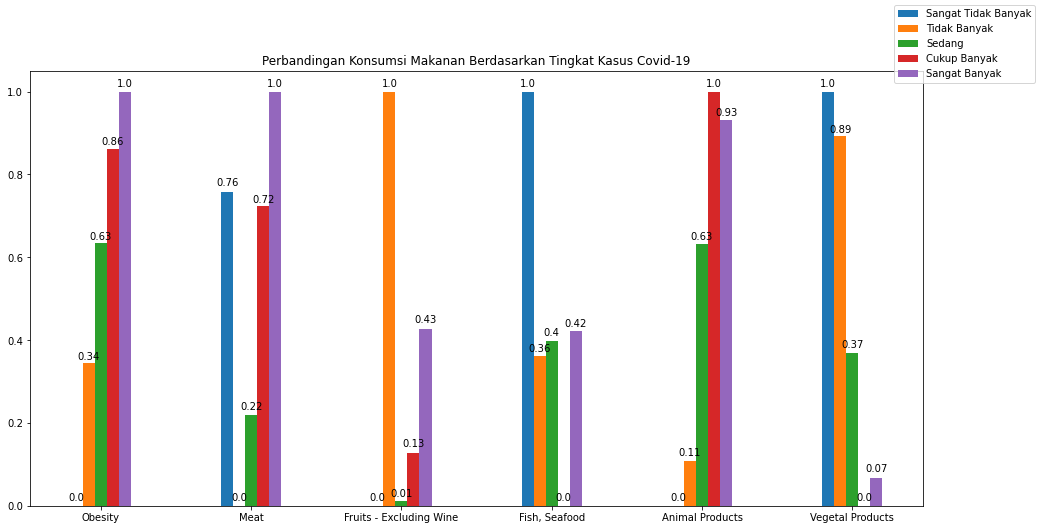

In [23]:
# Buat bar plot dari df_norm sesuai dengan expected output
# Code here
fig, ax = plt.subplots(figsize=(16,8))
x = np.arange(6)
barWidth = 0.08

rects1 = ax.bar(x, df_norm.iloc[0],width=barWidth,label=df_norm.index[0])
rects2 = ax.bar(x+(barWidth), df_norm.iloc[1],width=barWidth,label=df_norm.index[1])
rects3 = ax.bar(x+(2*barWidth), df_norm.iloc[2],width=barWidth,label=df_norm.index[2])
rects4 = ax.bar(x+(3*barWidth), df_norm.iloc[3],width=barWidth,label=df_norm.index[3])
rects5 = ax.bar(x+(4*barWidth), df_norm.iloc[4],width=barWidth,label=df_norm.index[4])

def autolabel(rects):
  '''Attach a text label above each bar in *rects*, displaying its height.'''
  for rect in rects:
    height_ = rect.get_height()
    height=round(height_,2)
    ax.annotate('{}'.format(height),
                  xy=(rect.get_x() + rect.get_width() / 2, height),
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords='offset points',
                  ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
fig.legend()
plt.xticks(x+(2*barWidth),df_norm.columns)
plt.title('Perbandingan Konsumsi Makanan Berdasarkan Tingkat Kasus Covid-19')
plt.show()
# Untuk menambahkan label di atas barplot lihat https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html


Expected output:
![Expected Output:](https://drive.google.com/uc?id=11x5OMAB8mbZurD0qntxcwOcWYCQSegy8)


---

# Soal 6: Scatter plot


Buatlah visualisasi scatter plot dari df_food antara Supply Sayuran ('Vegetal Products') dan persentase terkonfirmasi ('Confirmed') COVID-19 sesuai expected output dengan ketentuan berikut:


* Gunakan kolom persentase kematian ('Death') sebagai ukuran pointnya kalikan suatu angka yang cukup besar agar terlihat.
    
* Gunakan kolom persentase produk hewani ('Animal Products') sebagai warna point, berikan colormap 'viridis'.

In [24]:
df_food.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,...,17.0831,0.3593,4.5,29.8,0.098885,0.003635,0.078496,0.016754,38928000.0,%
1,Albania,0.0,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,...,9.2443,0.6503,22.3,6.2,0.366667,0.011240,0.217970,0.137456,2838000.0,%
2,Algeria,0.0,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,...,27.3606,0.5145,26.6,3.9,0.105176,0.003521,0.074363,0.027292,44357000.0,%
3,Angola,0.0,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,...,22.4638,0.1231,6.8,25,0.009166,0.000369,0.003736,0.005061,32522000.0,%
4,Antigua and Barbuda,0.0,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,...,14.4436,0.2469,19.1,NaN,0.096939,0.003061,0.092857,0.001020,98000.0,%


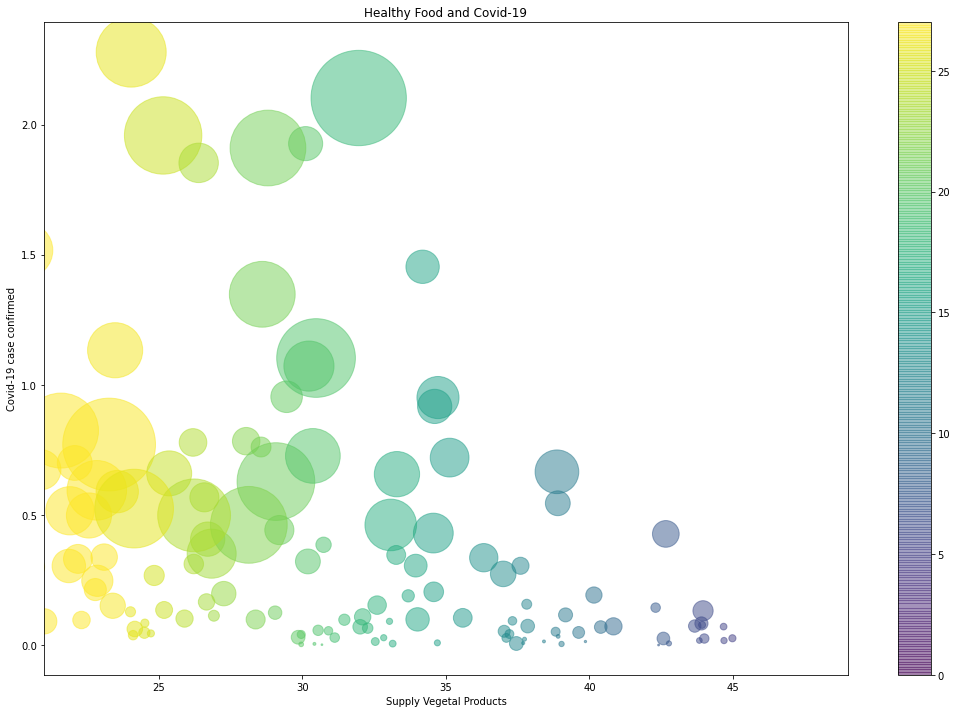

In [25]:
fig, ax = plt.subplots(figsize=(18, 12))

# Code here
size_ = (df_food['Deaths'])*100000
color_ = df_food['Animal Products']
colormap_='viridis'

scat_ = plt.scatter(x=df_food['Vegetal Products'], y=df_food['Confirmed'], s=size_, c=color_, cmap=colormap_, alpha=0.5, vmin=0,vmax=27)
plt.colorbar(scat_)
plt.xlabel('Supply Vegetal Products')
plt.ylabel('Covid-19 case confirmed')
plt.title('Healthy Food and Covid-19')
plt.xlim(21,49)
plt.show()

Expected output:
![Expected Output:](https://drive.google.com/uc?id=1wJh3tfkPbrkf3_F73RW0kABBt_NO8q53)